In [2]:
%matplotlib inline
from lexer import LangLexer
from parser import LangParser
from comb_parser import WhileCheckCorr
import datetime
import matplotlib.pyplot as plt
import datetime

In [2]:
element = 'a+=1; '

In [14]:
# creating two types of files: with tabulation and without it

def get_file(el_number, tab):
    if tab:
        string2parse = 'let i=1; let a=0; while i<=2 { ' + (element + '\n') * el_number + '}'
        name = str(el_number) + "_tab_elms.txt"
    else:
        string2parse = 'let i=1; let a=0; while i<=2 { ' + element * el_number + '}'
        name = str(el_number) + "_elms.txt"
    f = open('test_files/'+name, 'w')
    f.write(string2parse)
    f.close
    return name

In [15]:
get_file(20000, True)
get_file(20000, False)

'20000_elms.txt'

In [16]:
import os

# returns size in bytes

def getSize(filename):
    st = os.stat(filename)
    return st.st_size

In [17]:
getSize('test_files/20000_elms.txt')

120032

In [18]:
# files with tabulation require more memory

getSize('test_files/20000_tab_elms.txt')

140032

In [19]:
set_of_numbers = [2**i for i in range(18)]
times = []
set_of_numbers

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072]

In [21]:
sizes = []
tab_sizes = []
for i in set_of_numbers:
    tab_sizes.append(getSize('test_files/'+get_file(i, True)))
    sizes.append(getSize('test_files/'+get_file(i, False)))

In [23]:
sizes, tab_sizes

([38,
  44,
  56,
  80,
  128,
  224,
  416,
  800,
  1568,
  3104,
  6176,
  12320,
  24608,
  49184,
  98336,
  196640,
  393248,
  786464],
 [39,
  46,
  60,
  88,
  144,
  256,
  480,
  928,
  1824,
  3616,
  7200,
  14368,
  28704,
  57376,
  114720,
  229408,
  458784,
  917536])

In [24]:
# we skip part of reading file itself, because on large files, reading time can be considered as an error

def get_str(el_number):
    return 'let i=1; let a=0; while i<=2 { ' + element * el_number + '}'

In [25]:
lex = LangLexer()
parser_gen = LangParser()

In [26]:
# time test


for i in set_of_numbers:
    t1 = datetime.datetime.now()
    tree = parser_gen.parse(lex.tokenize(get_str(i)))
    t2 = datetime.datetime.now()
    
    times.append((t2 - t1).microseconds + (t2 - t1).seconds * 1000000)

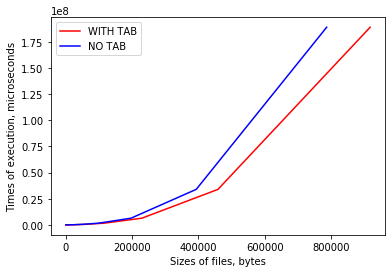

In [28]:
# plotting the resuts

plt.plot(tab_sizes, times, 'r', label = 'WITH TAB')
plt.plot(sizes, times, 'b', label = 'NO TAB')
plt.ylabel('Times of execution, microseconds')
plt.xlabel('Sizes of files, bytes')
plt.legend()
plt.show()